<h1 style="font-size: 36px; font-weight: bold;">Bank Customer Churn</h1>

## Business scenario and problem


This project centers on an anonymous multinational bank striving to retain its customer base and ensure ongoing business success. By harnessing the power of data analytics, the project aims to uncover customer churn patterns and key drivers, enabling the implementation of proactive retention strategies.

The primary aim is to foster customer loyalty and satisfaction by tailoring personalized services and offerings, cementing the bank's reputation as a customer-focused financial institution globally. Through a deeper understanding of customer preferences and behavior, the project seeks to create seamless and enriching banking experiences, solidifying the bank's position in the international market and ensuring long-term business sustainability.

Acquiring a new client is significantly more costly than retaining an existing one. Understanding the factors that drive a client's decision to leave the company is beneficial for banks. Implementing churn prevention enables companies to create loyalty programs and retention campaigns, aiming to retain as many customers as possible.

## Bank Dataset

In this <a href="https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data"><u>dataset</u></a></body> </html>, there are 10,000 rows and 19 columns, and these variables


<table>
  <tr>
    <th>Variable</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>RowNumber</td>
    <td>Corresponds to the record (row) number and has no effect on the output.</td>
  </tr>
  <tr>
    <td>CustomerId</td>
    <td>Contains random values and has no effect on customer leaving the bank.</td>
  </tr>
  <tr>
    <td>Surname</td>
    <td>The surname of a customer has no impact on their decision to leave the bank.</td>
  </tr>
  <tr>
    <td>CreditScore</td>
    <td>Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.</td>
  </tr>
  <tr>
    <td>Geography</td>
    <td>A customer’s location can affect their decision to leave the bank.</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>It’s interesting to explore whether gender plays a role in a customer leaving the bank.</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>This is certainly relevant, since older customers are less likely to leave their bank than younger ones.</td>
  </tr>
  <tr>
    <td>Tenure</td>
    <td>Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.</td>
  </tr>
  <tr>
    <td>Balance</td>
    <td>Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.</td>
  </tr>
  <tr>
    <td>NumOfProducts</td>
    <td>Refers to the number of products that a customer has purchased through the bank.</td>
  </tr>
  <tr>
    <td>HasCrCard</td>
    <td>Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.</td>
  </tr>
  <tr>
    <td>IsActiveMember</td>
    <td>Active customers are less likely to leave the bank.</td>
  </tr>
  <tr>
    <td>EstimatedSalary</td>
    <td>As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.</td>
  </tr>
  <tr>
    <td>Exited</td>
    <td>Whether or not the customer left the bank.</td>
  </tr>
  <tr>
    <td>Complain</td>
    <td>Whether the customer has a complaint or not.</td>
  </tr>
  <tr>
    <td>Satisfaction Score</td>
    <td>Score provided by the customer for their complaint resolution.</td>
  </tr>
  <tr>
    <td>Card Type</td>
    <td>Type of card held by the customer.</td>
  </tr>
  <tr>
    <td>Points Earned</td>
    <td>The points earned by the customer for using a credit card.</td>
  </tr>
</table>


<h1 style="font-size: 24px; font-weight: bold;">Imports</h1>
<ul>
    <li>Import packages
    <li>Load dataset
</ul>

In [ ]:
# Import packages
### YOUR CODE HERE ###

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


# For saving models
import pickle

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv('customer_churn_records.csv')

df0.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<h1 style="font-size: 24px; font-weight: bold;">Data Exploration (Initial EDA and data cleaning)</h1>
<ul>
    <li> Understand variables
    <li> Clean dataset (missing data, redundant data, outliers)
</ul>

### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Rename columns

Standardize column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed

In [ ]:
# Display all column names
df0.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
# Rename columns as needed
df0 = df0.rename(columns={'RowNumber': 'row_number',
                          'CustomerId': 'customer_id',
                          'Surname': 'surname',
                          'CreditScore': 'credit_score',
                          'Geography': 'geography',
                          'Gender': 'gender',
                          'Age': 'age',
                          'Tenure': 'tenure',
                          'Balance': 'balance',
                          'NumOfProducts': 'num_of_products',
                          'HasCrCard': 'has_cr_card',
                          'IsActiveMember': 'is_active_member',
                          'EstimatedSalary': 'estimated_salary',
                          'Exited': 'exited',
                          'Complain': 'complain',
                          'Satisfaction Score': 'satisfaction_score',
                          'Card Type': 'card_type',
                          'Point Earned': 'point_earned'})

# Dsiplay all column after update
df0.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited', 'complain',
       'satisfaction_score', 'card_type', 'point_earned'],
      dtype='object')

### Check missing values

In [ ]:
df0.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure                0
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
complain              0
satisfaction_score    0
card_type             0
point_earned          0
dtype: int64

There are no missing values in the data.

### Check for duplicates

Check for any duplicate entries in the data

In [ ]:
# Check for duplicates
df0.duplicated().sum()

0

There are no duplicates in the data

### Check outliers

Check for outliers in the data

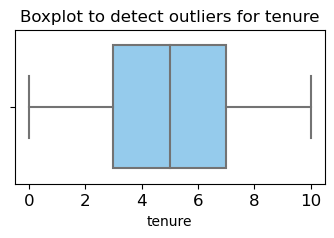

In [ ]:
# setting color palette
sns.set_palette(sns.color_palette(["lightskyblue", "salmon", "lightgreen"]))

# Boxplot used to visualize distribution of 'tenure' and detect any outliers
plt.figure(figsize=(4,2))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['tenure'])
plt.show()

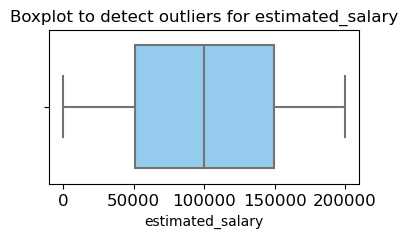

In [ ]:
# Boxplot used to visualize distribution of 'estimated_salary' and detect any outliers
plt.figure(figsize=(4,2))
plt.title('Boxplot to detect outliers for estimated_salary', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['estimated_salary'])
plt.show()

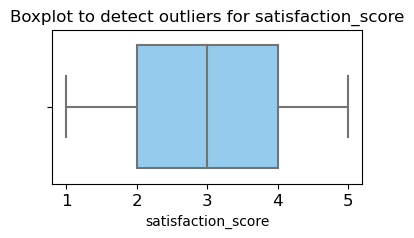

In [ ]:
# Boxplot used to visualize distribution of 'satisfaction_score' and detect any outliers
plt.figure(figsize=(4,2))
plt.title('Boxplot to detect outliers for satisfaction_score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['satisfaction_score'])
plt.show()

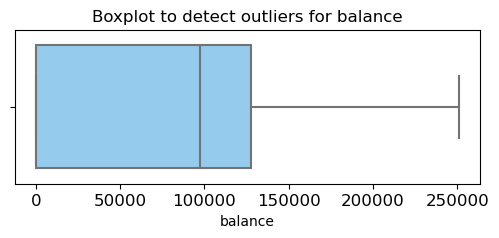

In [ ]:
# Boxplot used to visualize distribution of 'balance' and detect any outliers
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for balance', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['balance'])
plt.show()

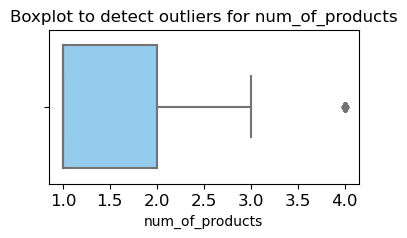

In [ ]:
# Boxplot used to visualize distribution of 'num_of_products' and detect any outliers
plt.figure(figsize=(4,2))
plt.title('Boxplot to detect outliers for num_of_products', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['num_of_products'])
plt.show()

The boxplots show that there are no outliers for `tenure`, `estimated_salary`, and `satisfaction_score`. The boxplox for the `balance` column shows that there is a right skew, suggesting there is an asymmetrical distribution around the median. The boxplot for `num_of_products` show that there is an outlier.

Let's investigate if the rows may contain any outliers in the `num_of_products` column.

In [ ]:
# Determine number of rows with outliers

# 25th percentile in `num_of_products`
percentile25 = df0['num_of_products'].quantile(0.25)

# 75th percentile in `balance`
percentile75 = df0['num_of_products'].quantile(0.75)

# Interquartile range in `balance`
iqr = percentile75 - percentile25

# Upper and lower limit for non-outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# subset of data containing outliers
outliers = df0[(df0['num_of_products'] > upper_limit) | (df0['num_of_products'] < lower_limit)]

# Count rows that contain outliers in `balance`
print("Number of rows in the data containing outliers in `num_of_products`:", len(outliers))

Lower limit: -0.5
Upper limit: 3.5
Number of rows in the data containing outliers in `num_of_products`: 60


Based on the results of the boxplots, it seems like there are 60 outliers in the `num_of_products` column.

## Data Exploration

How many customers exited and what percentage of all customers does it represent

In [ ]:
# Number of people who exited vs. stayed
print(df0['exited'].value_counts())
print()

# Percentage of people who exited vs. stayed
print(df0['exited'].value_counts(normalize=True))

0    7962
1    2038
Name: exited, dtype: int64

0    0.7962
1    0.2038
Name: exited, dtype: float64


A stacked boxplot to show `tenure` and `num_of_products` will be used to compare the distributions of customers who exited versus those who stayed.

A box plot will be used to show the distribution of `num_of_products` for those who stayed and those who exited.

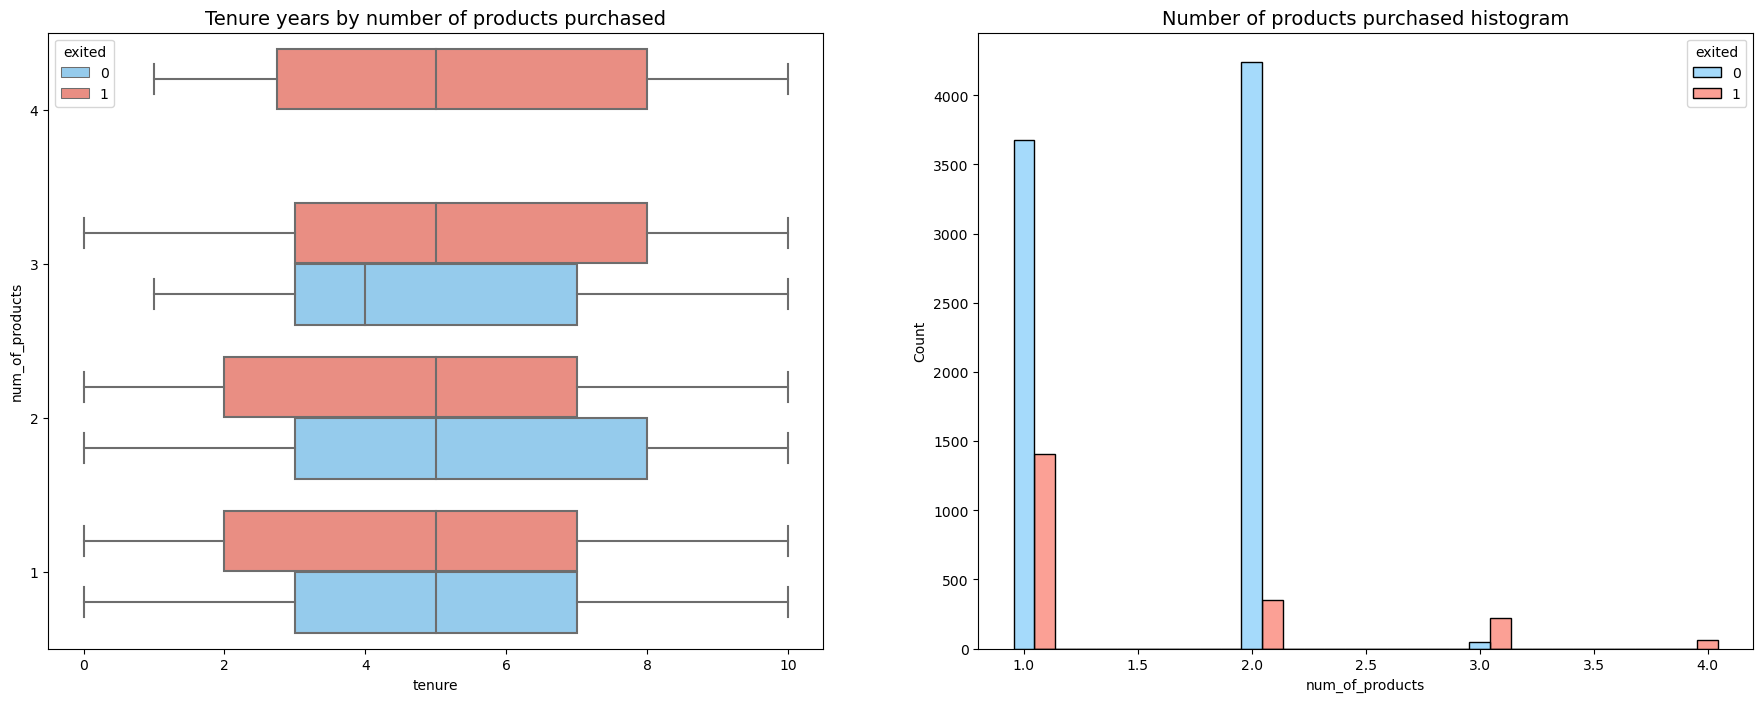

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `tenure` distributions for 'num_of_products'
sns.boxplot(data=df0, x='tenure', y='num_of_products', hue='exited', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Tenure years by number of products purchased', fontsize='14')

# Create histogram showing distribution of `num_of_products`
stay = df0[df0['exited']==0]['num_of_products']
exited = df0[df0['exited']==1]['num_of_products']
sns.histplot(data=df0, x='num_of_products', hue='exited', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of products purchased histogram', fontsize='14')

# Display plots
plt.show()

The stacked boxplot displays a boxplot for customers who exited when the number of products purchased hits 4. With four products purchase, we can speculate that customers are more likely to churn or leave the bank. This could suggest that the complexity of additional services associated with having more products might contribute to higher likelihood of customers leaving the bank.

It seems as the number of products incraeses, the number of customers who exit the bank increases after 2 products purchased.
Those who purchased a single product is more likely to exit than those purchase two products. The proportion for those who stayed and exited is significantly greater when two products are purchased versus one.

In [ ]:
# Value count of those who stayed/exited for customers who purchased 4 products
df0[df0['num_of_products']==4]['exited'].value_counts()

1    60
Name: exited, dtype: int64

This confirms that all customers who purchased 4 products exited.

Determining whether `credit_score` is affected by the customers `age`

Text(0.5, 1.0, 'Credit score by age')

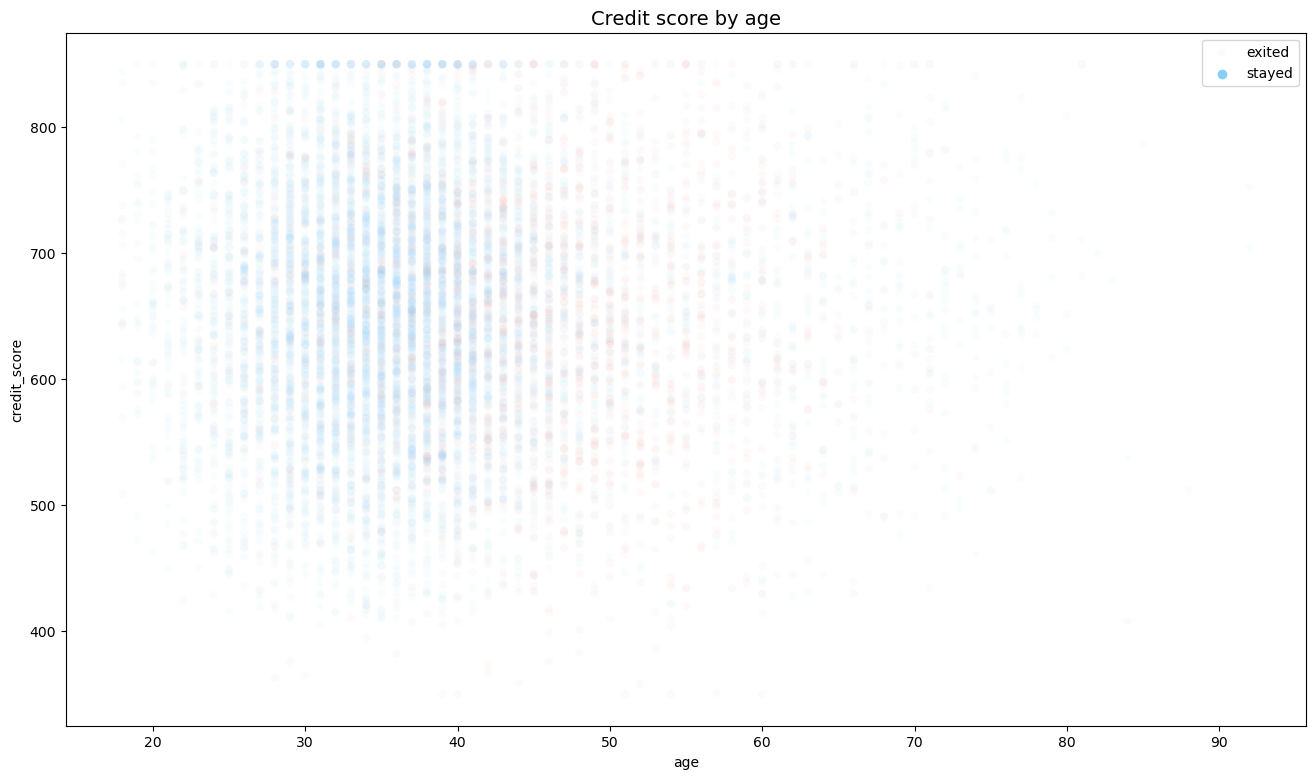

In [ ]:
# Scatterplot of `credit_score` versus `age`

plt.figure(figsize=(16,9))
sns.scatterplot(data=df0, x='age', y='credit_score', hue='exited', alpha=0.04)
plt.legend(labels=['exited', 'stayed'])
plt.title('Credit score by age', fontsize='14')

The scatterplot above shows those with a credit score of around 550 to 750 were mostly customers in their late 20's to those in their early 40's. It seems like most of the bank's customers with a credit score is in that age range.

Visualizing satisfaction score by tenure

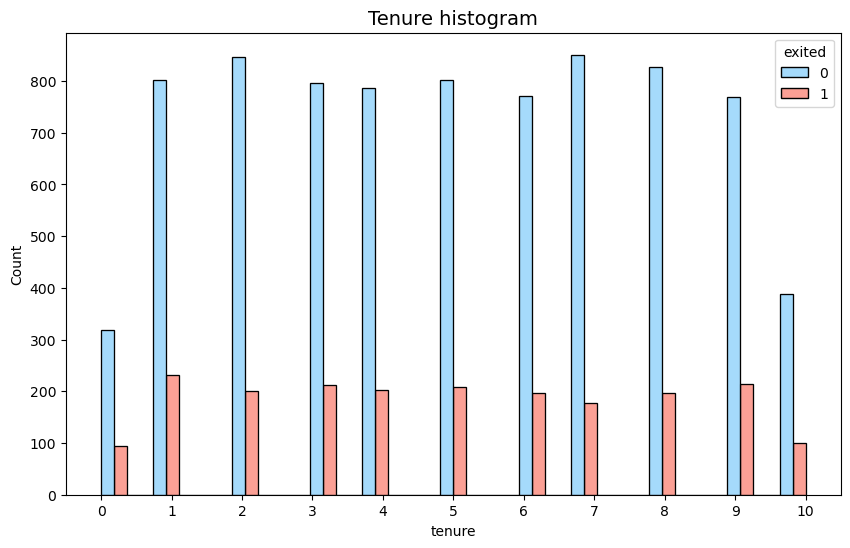

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram distribution of 'tenure'
tenure_stay = df0[df0['exited'] == 0]['tenure']
tenure_exited = df0[df0['exited'] == 1]['tenure']
sns.histplot(data=df0, x='tenure', hue='exited', multiple='dodge', shrink=1, ax=ax)
ax.set_title('Tenure histogram', fontsize='14')
ax.set_xticks(df0['tenure'].unique())  # Setting the x-axis ticks

plt.show()

Based on the histogram, the distribution of customers who stayed and those who left appears similar, suggesting that tenure might not be a significant factor in determining customer churn.

In [ ]:
# How many customers voted for each score in 'satisfaction_score'
score_counts = df0['satisfaction_score'].value_counts().sort_index()
print(score_counts)

1    1932
2    2014
3    2042
4    2008
5    2004
Name: satisfaction_score, dtype: int64


In [ ]:
df0['geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
satisfaction_score_counts = df0.groupby(['geography', 'satisfaction_score']).size().unstack().fillna(0)
print(satisfaction_score_counts)


satisfaction_score    1    2     3     4    5
geography                                    
France              964  999  1033  1020  998
Germany             490  504   528   475  512
Spain               478  511   481   513  494


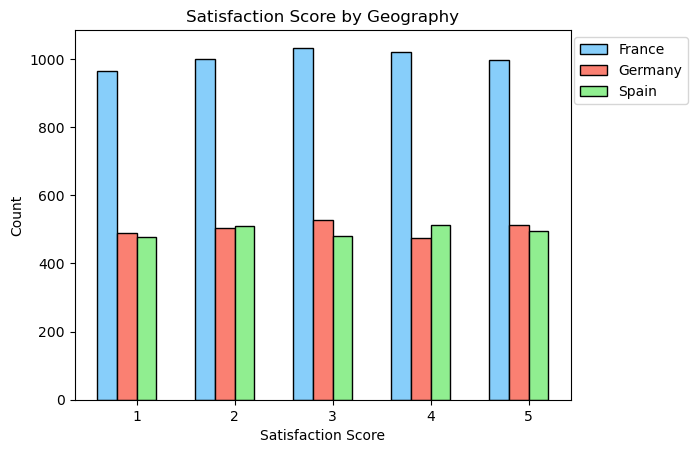

In [ ]:
# Data
data = {
    'France': [964, 999, 1033, 1020, 998],
    'Germany': [490, 504, 528, 475, 512],
    'Spain': [478, 511, 481, 513, 494]
}

geographies = list(data.keys())

# Plotting barchart to compare 'satisfaction_score' and 'geographies'
bar_width = 0.2
index = np.arange(len(data['France']))

fig, ax = plt.subplots()
for i, geography in enumerate(geographies):
    ax.bar(index + i * bar_width, data[geography], bar_width, label=geography, edgecolor='black')

ax.set_xlabel('Satisfaction Score')
ax.set_ylabel('Count')
ax.set_title('Satisfaction Score by Geography')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(index + 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

Based on the data, it appears that both Germany and France received a slightly higher number of satisfaction scores of 3 compared to other scores. Meanwhile, Spain had a somewhat balanced distribution between scores 2 and 4. Although the differences are marginal, it's notable that approximately half of the bank's customer base is from France.

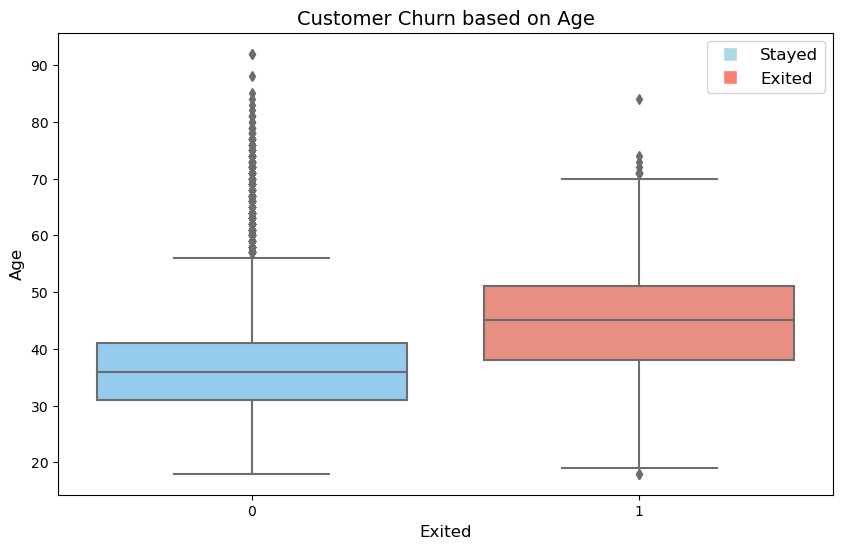

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='age', data=df0)
plt.title('Customer Churn based on Age', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Add custom legend
legend_labels = ['Stayed', 'Exited']
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, ['lightblue', 'salmon'])]
plt.legend(handles=legend_patches, loc='upper right', fontsize=12)

plt.show()


The boxplot analysis indicates that customers who exited the service were generally older compared to those who stayed. The median age for those who left was higher than the median age for those who stayed. Furthermore, the interquartile range for the group that exited was wider, suggesting a greater spread of ages within that group. Additionally, the presence of outliers, particularly among the group that stayed, suggests the existence of a subset of older customers within the service.

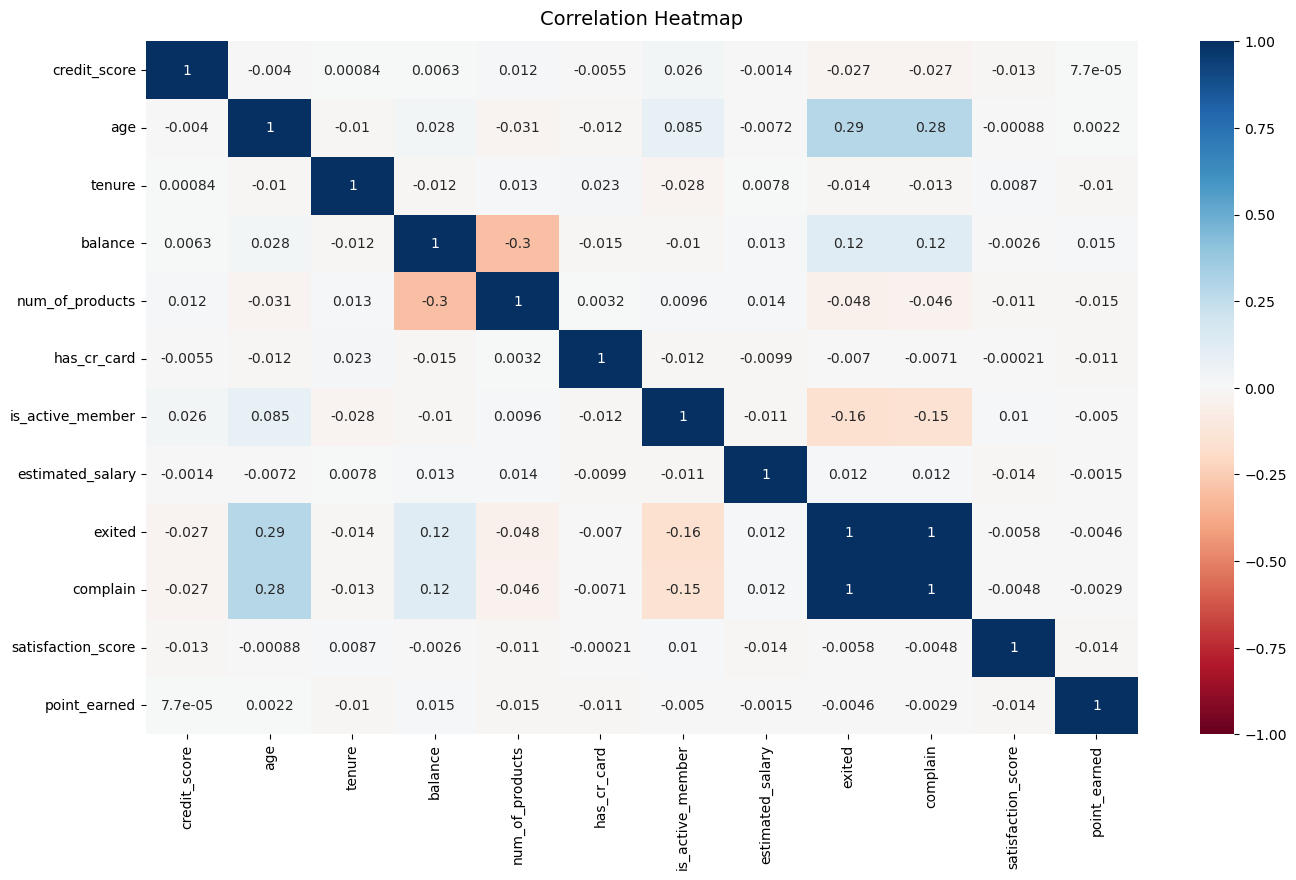

In [ ]:
# Drop 'row_number' and 'customer_id'
df_heatmap = df0.drop(['row_number', 'customer_id'], axis=1)

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_heatmap.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("RdBu", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Check for strong correlation between variables in the data

The correlation heatmap reveals several notable associations within the dataset.

<ul>
<li>Positive correlation between <i>age</i>, <i>complain</i>, <i>balance</i>, and <i>is_active_member</i>.</li>
<li><i>Num_of_products</i> and <i>has_cr_card</i> exhibit a negative correlation with <i>age</i>.</li>
<li><i>Num_of_products</i> also demonstrate a negative correlation with <i>exited</i> and <i>complain</i>.</li>
<li><i>Exited</i> and <i>complain</i> display a negative correlation with <i>credit_score</i>.</li>
<li><i>Is_active_member</i> showcases a stronger negative correlation with <i>exited</i> and <i>complain</i>.</li>
<li><i>Balance</i> and <i>num_of_products</i> highlight the most pronounced negative correlation in the heatmap.</li>
</ul>

### Insights

It seems that customer churn may be influenced by several factors. Notably, customers with higher balances and those with multiple products are more likely to churn. Additionally, dissatisfaction may play a role, as customers with lower satisfaction scores also tend to churn more frequently. However, interestingly, there doesn't appear to be a strong correlation between churn and other factors such as credit score, geography, or gender. This suggests that customer churn may be more related to specific behaviors and experiences rather than general demographic factors.

It's worth noting that age exhibits the highest positive correlation with customer complaints and churn. This indicates that older customers might be more likely to raise concerns or choose to discontinue their services. Age, therefore, could be an essential factor to consider when understanding and addressing customer satisfaction and retention.

## Model Building
<ul>
    <li> Fit a model that predicts outcome variable using two or more independent variables
    <li> Check for model assumptions
</ul>

Create a heatmap to visualize how variables are correlated.

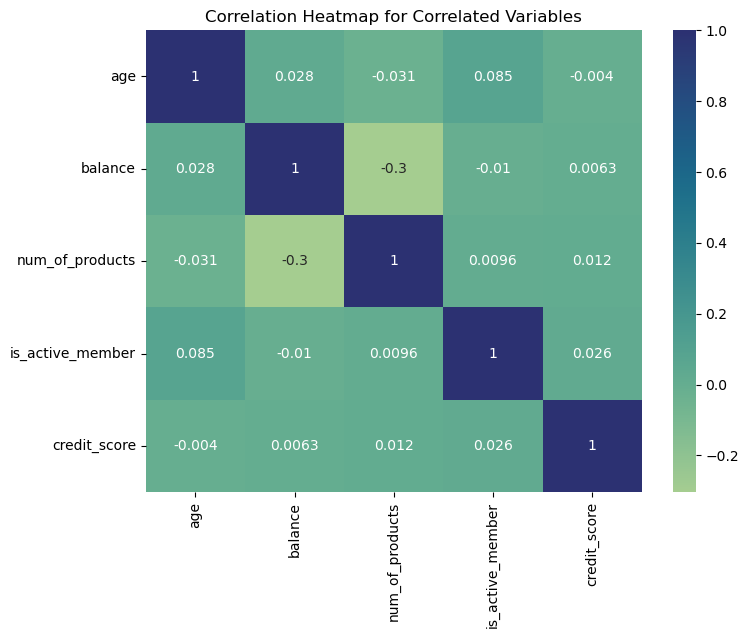

In [ ]:
# Create a heatmap to visualize the correlations between variables
plt.figure(figsize=(8, 6))
sns.heatmap(df0[['age', 'balance', 'num_of_products', 'is_active_member', 'credit_score']]
           .corr(), annot=True, cmap="crest")
plt.title('Correlation Heatmap for Correlated Variables')
plt.show()


### Logistic Regression

Binary logistic regression involves binary classification.

Non-numeric variables must be encoded for modeling. There are four: `surname`, `geography`, `gender`, and `card_type`.

`surname` will have no use in predictive modeling and we found that `geography` does not have any correlation with customer churn.
Therefore, we will encode: `gender` and `card_type`.

In [ ]:
df0['card_type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [ ]:
# Copy the dataframe
df_enc = df0.copy()

# Encode the 'card_type' column as an ordinal numeric category
card_type_map = {'diamond': 3, 'platinum': 2, 'gold': 1, 'silver': 0}
df_enc['card_type'] = df_enc['card_type'].map(card_type_map)

# Encode the 'gender' column as binary
df_enc['gender'] = df_enc['gender'].map({'Female': 0, 'Male': 1})

# Dummy encode the 'department' column
df_enc = pd.get_dummies(df_enc, columns=['card_type'], drop_first=False)

# Display the new dataframe
df_enc.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,point_earned
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425


Create a stacked bar plot to visualize number of customers for each card type and each gender.

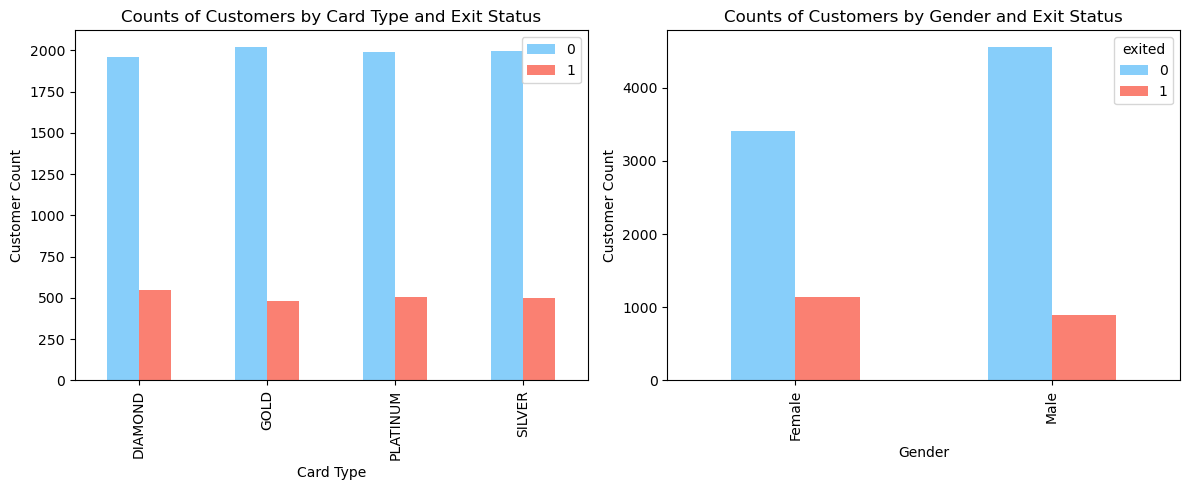

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for card types
pd.crosstab(df0['card_type'], df0['exited']).plot(kind='bar', ax=axs[0])

axs[0].set_title('Counts of Customers by Card Type and Exit Status')
axs[0].set_ylabel('Customer Count')
axs[0].set_xlabel('Card Type')
axs[0].legend(loc='upper right')

# Plot for gender
pd.crosstab(df0['gender'], df0['exited']).plot(kind='bar', ax=axs[1])
axs[1].set_title('Counts of Customers by Gender and Exit Status')
axs[1].set_ylabel('Customer Count')
axs[1].set_xlabel('Gender')

# Adjust layout
plt.tight_layout()
plt.show()


According to the data depicted in the charts, the presence of different card types appears to have no discernible impact on the decision to stay or leave. The proportions remain consistent across all card types.

Regarding gender differences, the data suggests a disparity, with a higher likelihood of females leaving compared to males. Approximately one-third of the females in the data left, while the proportion for males leaving was approximately one-fifth.

Logistic regression is sensitive to outliers so the outliers in `num_of_products` will be removed.

In [ ]:
# Select rows without outliers in 'num_of_products' and save the resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['num_of_products'] >= lower_limit) & (df_enc['num_of_products'] <= upper_limit)]

# Display the first few rows of the new dataframe
df_logreg.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,point_earned
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425


Isolating the outcome variable (variable we want to predict).

In [ ]:
# Isolate outcome variable
y = df_logreg['exited']

# Display first few rows of outcome variable
y.head()

0    1
1    0
2    1
3    0
4    0
Name: exited, dtype: int64

Select features for model to predict outcome variable, `exited`. Drop any redundant variables

In [ ]:
# Selecting features for model and dropping any redundant variables
X = df_logreg.drop(['exited', 'surname', 'geography', 'customer_id', 'row_number'], axis=1)

# Display first few rows of selected features
X.head()

,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,complain,satisfaction_score,point_earned
0,619,0,42,2,0.00,1,1,1,101348.88,1,2,464
1,608,0,41,1,83807.86,1,0,1,112542.58,1,3,456
2,502,0,42,8,159660.80,3,1,0,113931.57,1,3,377
3,699,0,39,1,0.00,2,0,0,93826.63,0,5,350
4,850,0,43,2,125510.82,1,1,1,79084.10,0,5,425


In [ ]:
print(X.shape)
print(y.shape)


(9940, 12)
(10000,)


Split the data into training set and testing set. Set stratify based on values in `y`.

In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct logisitc regression model and fit to training dataset

In [ ]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test logisitc regression model: use model to make predictions on test set.

In [ ]:
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

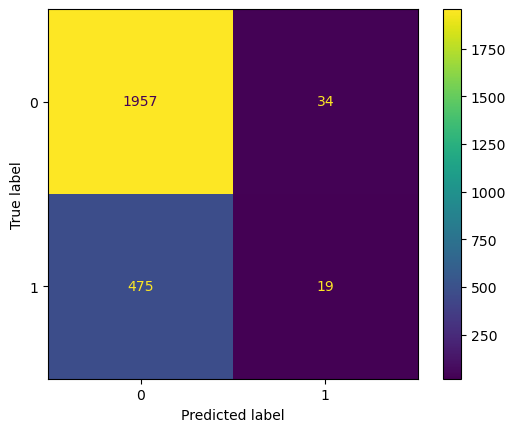

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The count of customers predicted as not leaving who actually did not leave.

False positives: The count of customers predicted as leaving but who actually did not leave.

False negatives: The count of customers predicted as not leaving but who actually left.

True positives: The count of customers predicted as leaving who actually did leave.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Check for class balance in the data, check value counts in `exited` column.

In [ ]:
df_logreg['exited'].value_counts(normalize=True)

0    0.801006
1    0.198994
Name: exited, dtype: float64

In [ ]:
# Count the occurrences of each class in the target variable
class_counts = df0['exited'].value_counts()

# Display the counts
print(class_counts)


0    7962
1    2038
Name: exited, dtype: int64


There is approcimately 80%-20% split. The data is not perfectly balanced but it also not too imbalanced.

In [ ]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=1))

                           precision    recall  f1-score   support

Predicted would not leave       0.80      0.98      0.88      1991
    Predicted would leave       0.36      0.04      0.07       494

                 accuracy                           0.80      2485
                macro avg       0.58      0.51      0.48      2485
             weighted avg       0.72      0.80      0.72      2485



The classification report shows that logistic regression achieved a precision of 72%, recall of 80%, f1-score of 72% and accuracy of 80%.

Based on the classification report and the confusion matrix, here is the analysis of your model's performance:

Precision of 72% implies that among the predicted positives, 72% were actually true positives, indicating that the model is moderately successful in identifying true positives.

Recall of 80% suggests that out of all the actual positive cases, the model identified 80% of them, indicating that it is fairly sensitive in detecting positive instances.

F1-score of 72% implies that the model maintains a reasonable balance between precision and recall, indicating its overall effectiveness in classifying positive cases.

With an accuracy of 80%, the model is correctly predicting the outcome for 80% of the cases, indicating that it performs well overall.

Analyzing the confusion matrix, it seems that the model is effective in identifying true negatives and true positives, but it has some difficulty in minimizing false negatives.

Perform a 5-fold cross-validation to compare the two and determine whether the model's performance remains consistent across different datasets.

In [ ]:
# Assuming X and y are your feature and target variables

# Initialize the model
log_reg = LogisticRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

# Print the accuracy for each fold
for i, score in enumerate(scores, 1):
    print(f"Accuracy for fold {i}: {score}")

# Print the mean accuracy
print(f"Mean Accuracy: {scores.mean()}")


Accuracy for fold 1: 0.795774647887324
Accuracy for fold 2: 0.7922535211267606
Accuracy for fold 3: 0.7962776659959758
Accuracy for fold 4: 0.795774647887324
Accuracy for fold 5: 0.789738430583501
Mean Accuracy: 0.7939637826961772


The 5-fold cross-validation results indicate that the logistic regression model achieved consistent accuracies across different subsets of the data. The average accuracy of approximately 79.4% suggests that the model performs reasonably well in predicting the outcome of interest.

## Modeling Approach: Tree-based Model

### Random Forest Tree

Isolate the outcome variable

In [ ]:
# Isolate the outcome variable
y = df_enc['exited']

# Display the first few rows of `y`
y.head()

0    1
1    0
2    1
3    0
4    0
Name: exited, dtype: int64

Select the features

In [ ]:
# Selecting features for model and dropping any redundant variables
X = df_logreg.drop(['exited', 'surname', 'geography', 'customer_id', 'row_number'], axis=1)

# Display first few rows of `X`
X.head()

,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,complain,satisfaction_score,point_earned
0,619,0,42,2,0.00,1,1,1,101348.88,1,2,464
1,608,0,41,1,83807.86,1,0,1,112542.58,1,3,456
2,502,0,42,8,159660.80,3,1,0,113931.57,1,3,377
3,699,0,39,1,0.00,2,0,0,93826.63,0,5,350
4,850,0,43,2,125510.82,1,1,1,79084.10,0,5,425


Split the data into training, validating, and testing sets.

In [ ]:
# Align the sizes of X and y
y = y[:9940]

# Check the shapes of X and y
print(X.shape)
print(y.shape)

# Split the data with the same sample size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

(9940, 12)
(9940,)


Construct a random forest model and set up cross-validated grid-search to search for the best model parameters.

In [ ]:
# Split the data into a subset
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.9, random_state=0) # Adjust the test_size to get the desired subset size

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }

# Assign a list of scoring metrics to capture, including 'zero_division' parameter
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc', error_score=0, verbose=0, n_jobs=-1)

# Fit the model on the subset
rf1.fit(X_subset, y_subset)


GridSearchCV(cv=4, error_score=0,
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Fit the random forest model to the training data

In [ ]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 5.11 s
Wall time: 14min 47s


GridSearchCV(cv=4, error_score=0,
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Define functions to pickle the model and read in the model.

In [ ]:
def write_pickle(model_object, save_as:str):
    '''
    In:
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the current working directory
    '''
    with open(save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(saved_model_name:str):
    '''
    In:
        saved_model_name: filename of the pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Save model in a pickle and then read it in Jupyter notebook's directory.

In [ ]:
# Write pickle and save to Jupyter directory
write_pickle(rf1, 'hr_rf1')

In [ ]:
rf1 = read_pickle('hr_rf1')

Identify best AUC score from random forest model on training set.

In [ ]:
rf1.best_score_

0.5265795946293296

Identify the optimal values for the parameters of the random forest model.

In [ ]:
rf1.best_params_

{'max_depth': 3,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

Collect evaluation scores on training set for random forest models

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [ ]:
# Get CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(rf1_cv_results)

              model  precision  recall   F1  accuracy      auc
0  random forest cv        0.0     0.0  0.0  0.795976  0.52658


Evaluate the final model of the test set

Define function that gets all scores from model's prediction

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds, zero_division=1)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

Use best performing model to predict on the test set.

In [ ]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,1.0,0.0,0.0,0.795976,0.5


## Results and Evaluation
<ul>
    <li> Interpret model
    <li> Evaluate model performance
    <li> Prepare results, visualizations and actionable steps to share with stakeholders
<ul\>

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 72%, recall of 80%, f1-score of 72% and accuracy of 80%. The 5-fold cross validation resulted in an average accuracy of 79.4% making it a reasonable predictor for customer churn.

**Random Forest**

The random forest model, trained on a dataset with 9940 samples, produced a best AUC score of 0.5266. While the model seems to perform relatively well with an accuracy of 79.6%, it is observed that the precision, recall, and F1 score are significantly lower. Additionally, the AUC score is at 0.5, indicating poor discriminatory power.

### Conclusion, Recommendations, Next Steps

**Conclusions:**

* The number of products purchased appears to play a significant role in customer churn, particularly when the count reaches four. This suggests that an increase in product complexity may contribute to higher churn rates.
* Age demonstrates the most substantial positive correlation with customer complaints and churn, highlighting the importance of understanding the impact of age on customer satisfaction and retention.
* While various factors such as balance, multiple products, and satisfaction scores influence customer churn, no strong correlation is observed between churn and other demographic factors like credit score, geography, or gender.
* The random forest model demonstrated relatively good overall performance but showed some limitations in accurately identifying customers at risk of churning.

**Recommmendations:**

* Implement targeted strategies to manage customer churn, focusing on those with higher product counts and older customers, as they seem to be more prone to leaving.
* Devise customer retention initiatives that address individual satisfaction concerns, considering that dissatisfaction appears to significantly impact churn rates.
* Develop customer service protocols to address complaints and concerns, especially among older customers, and tailor support systems to meet their specific needs.
* Initiate interventions and programs specifically designed to address the higher likelihood of female customers leaving, emphasizing customer engagement and support for this demographic group.
* Focus on enhancing data quality and collection methodologies to ensure a more accurate representation of customer behavior and preferences, allowing for more precise predictions.

**Next Steps:**

* Verify the potential impact of data leakage and ensure the robustness of the analysis by evaluating model performance without certain features. This approach would help determine the degree of influence that specific variables have on the predictions and whether they contribute to data leakage.
* Consider utilizing the dataset for a K-means clustering analysis
* Consider refining the model by exploring alternative machine learning approaches or improving the quality and relevance of the data.